Part 3: Linear Regression<br> Group 16

Linear Regression on regression-dataset 


Model Performance:
Mean Squared Error: 1.308924166203881
R^2 Score: 0.14751972352916287


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


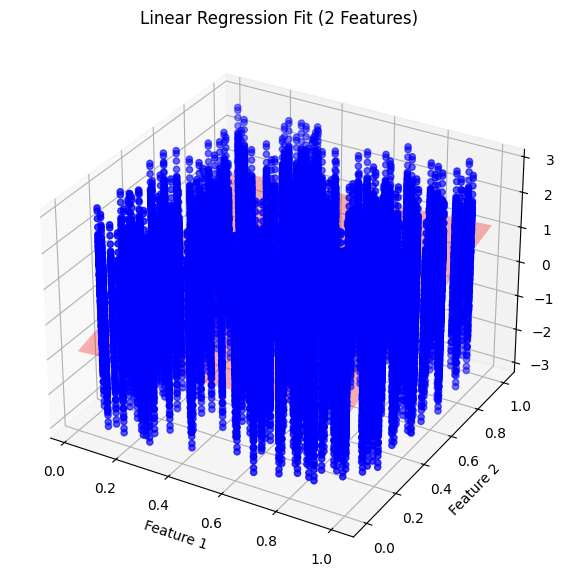

In [5]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

#CSV files import (assuming csv files are in a folder named regression-dataset)
train_inputs = pd.read_csv('regression-dataset/train_inputs.csv')
train_targets = pd.read_csv('regression-dataset/train_targets.csv')

model = LinearRegression()

#fit model
model.fit(train_inputs, train_targets)

#predict on the training set for evaluation
train_predictions = model.predict(train_inputs)

#model performance
mse = mean_squared_error(train_targets, train_predictions)
r2 = r2_score(train_targets, train_predictions)
print("\nModel Performance:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

#visualization
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
    
#scatter plot
ax.scatter(train_inputs.iloc[:,0], train_inputs.iloc[:,1], train_targets, color='blue', label='Data Points')
    
#mesh grid
x_surf, y_surf = np.meshgrid(
    np.linspace(train_inputs.iloc[:,0].min(), train_inputs.iloc[:,0].max(), 20),
    np.linspace(train_inputs.iloc[:,1].min(), train_inputs.iloc[:,1].max(), 20)
)
#flatten the grid arrays and stack as input features
exog = np.column_stack((x_surf.ravel(), y_surf.ravel()))
z_surf = model.predict(exog).reshape(x_surf.shape)
    
#plot
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)
    
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title('Linear Regression Fit (2 Features)')
plt.show()

Graph showing average mean squared error based on 10-fold cross validation

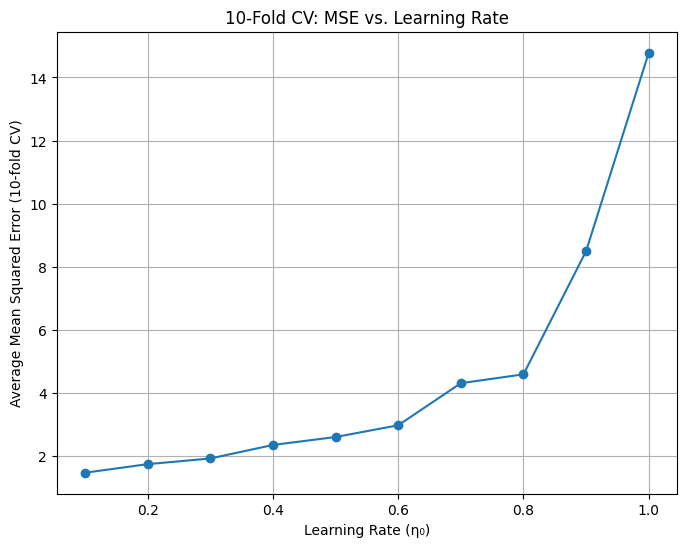

In [9]:
#learning rates from 0 to 1 in increments of 0.1
learning_rates = np.arange(0, 1.1, 0.1)
avg_mse_scores = []

#perform 10-fold cross validation for each learning rate
for lr in learning_rates:
    #skip lr=0 since it's not valid for SGDRegressor
    if lr == 0:
        avg_mse_scores.append(np.nan)
        continue
    model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=lr, random_state=42)
    scores = cross_val_score(model, train_inputs, train_targets, cv=10, scoring='neg_mean_squared_error')
    avg_mse = -scores.mean()  #convert from negative MSE to positive MSE
    avg_mse_scores.append(avg_mse)

#plot the average MSE versus learning rate
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, avg_mse_scores, marker='o')
plt.xlabel("Learning Rate (η₀)")
plt.ylabel("Average Mean Squared Error (10-fold CV)")
plt.title("10-Fold CV: MSE vs. Learning Rate")
plt.grid(True)
plt.show()

Best Learning Rate found by 10-fold cross validation + cross validation mean squared error

In [11]:
#numpy arrays work better
learning_rates_arr = np.array(learning_rates)
avg_mse_scores_arr = np.array(avg_mse_scores)

#create a mask for valid learning rates (i.e., where MSE is not NaN)
valid_mask = ~np.isnan(avg_mse_scores_arr)
valid_lrs = learning_rates_arr[valid_mask]
valid_mses = avg_mse_scores_arr[valid_mask]

#find the index of the minimum MSE among valid values
best_index = np.argmin(valid_mses)
best_lr = valid_lrs[best_index]
best_mse = valid_mses[best_index]

print("Best learning rate found:", best_lr)
print("Cross-validation Mean Squared Error:", best_mse)

Best learning rate found: 0.1
Cross-validation Mean Squared Error: 1.4639520401913946


Test Mean Squared Error

In [17]:
#reload data without headers (they dont match?)
train_inputs = pd.read_csv('regression-dataset/train_inputs.csv', header=None)
train_targets = pd.read_csv('regression-dataset/train_targets.csv', header=None)
test_inputs = pd.read_csv('regression-dataset/test_inputs.csv', header=None)
test_targets = pd.read_csv('regression-dataset/test_targets.csv', header=None)

#flatten targets
train_targets = train_targets.values.ravel()
test_targets = test_targets.values.ravel()

#fit and predict
best_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=best_lr, random_state=42)
best_model.fit(train_inputs, train_targets)
test_predictions = best_model.predict(test_inputs)
test_mse = mean_squared_error(test_targets, test_predictions)
print("Test Mean Squared Error with best learning rate ({}):".format(best_lr), test_mse)

Test Mean Squared Error with best learning rate (0.1): 1.5469884504145637
